In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading CSV files using Pandas

In [2]:
PATH = "tourist_arrival.csv"  # Please adjust your PATH and filename accordingly

df = pd.read_csv(PATH, index_col=0)
print(df)

       Jan.   Feb.   Mar.   Apr.   May.   Jun.   Jul.   Aug.   Sep.   Oct.   
Year                                                                         
1992  17451  27489  31505  30682  29089  22469  20942  27338  24839  42647  \
1993  19238  23931  30818  20121  20585  19602  13588  21583  23939  42242   
1994  21735  24872  31586  27292  26232  22907  19739  27610  27959  39393   
1995  22207  28240  34219  33994  27843  25650  23980  27686  30569  46845   
1996  27886  29676  39336  36331  29728  26749  22684  29080  32181  47314   
1997  25585  32861  43177  35229  33456  26367  26091  35549  31981  56272   
1998  28822  37956  41338  41087  35814  29181  27895  36174  39664  62487   
1999  29752  38134  46218  40774  42712  31049  27193  38449  44117  66543   
2000  25307  38959  44944  43635  28363  26933  24480  34670  43523  59195   
2001  30454  38680  46709  39083  28345  13030  18329  25322  31170  41245   
2002  17176  20668  28815  21253  19887  17218  16621  21093  23

In [3]:
#taking average value of all columns
avg=np.array(df)
Monthly_Avg=np.mean(avg[:,0:12],axis=0)
print(Monthly_Avg)

[29457.22727273 37002.90909091 46769.77272727 38054.77272727
 31734.86363636 28415.36363636 27963.45454545 38669.27272727
 39013.90909091 59135.13636364 47352.31818182 37719.        ]


a. Make a bar plot for the number of tourists that arrived each month (Jan - Dec). Make sure to take the 
average value from all the years (1992-2013). 



In [4]:
#months used for plotting y-axis on the bar plot
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months_full=['January','Febuary','March','April','May','June','July','August','September','October','November','December']

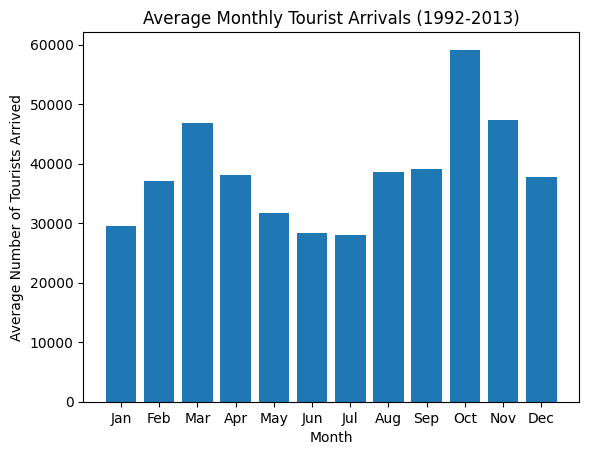

In [5]:
#plot code
plt.bar(months, Monthly_Avg)
plt.xlabel('Month')
plt.ylabel('Average Number of Tourists Arrived')
plt.title('Average Monthly Tourist Arrivals (1992-2013)')
plt.show()

b. The seasons are defined as follows: Spring (March, April, May), Summer (June, July, August), Autumn 
(September, October, November), Winter (December, January, February). From the data, can you predict 
the most popular season for tourist arrival as well as the least popular season.

In [6]:
#take column data for seasons
Winter=df['Jan.'].sum() + df['Feb.'].sum() + df['Dec.'].sum()
Autumn=df['Sep.'].sum() + df['Oct.'].sum() + df['Nov.'].sum()
Summer=df['Jun.'].sum() + df['Jul.'].sum() + df['Aug.'].sum()
Spring=df['Mar.'].sum() + df['Apr.'].sum() + df['May.'].sum()

#making a dict 
Seasons={'Winter':Winter, 'Autumn':Autumn, 'Summer':Summer, 'Spring':Spring}


#finding the most and least popular season from the dict
Most_popular=max(Seasons,key=Seasons.get)
Least_popular=min(Seasons, key=Seasons.get)


#answer
print("Most popular season for tourist arrival is", Most_popular," with ", max(Seasons.values()), "tourists")
print()
print("least popular season for tourist arrival is", Least_popular, " with ", min(Seasons.values()), "tourists")





Most popular season for tourist arrival is Autumn  with  3201030 tourists

least popular season for tourist arrival is Summer  with  2091058 tourists


c. Finally, can you predict the five worst months from the data where the tourist arrival was at its 
lowest. 
[Hint: Your answer should be set like: June 2001, July 2002, …]


Note: The remaining 5 points will be given if the application has desirable features, appropriate input 
validation, well-commented code, modular design, and appropriate error handling.

In [7]:
#using dict comprehension to make a months and year dict that corresponds to the rows and cols index of the csv file
col={months_full[i]:[i] for i in range(12)} 

beg_year=1992
row={str(beg_year+i):[i] for i in range(22) }

#This code can be changed according to the dimesions of the csv file
print(row)
print(col)

{'1992': [0], '1993': [1], '1994': [2], '1995': [3], '1996': [4], '1997': [5], '1998': [6], '1999': [7], '2000': [8], '2001': [9], '2002': [10], '2003': [11], '2004': [12], '2005': [13], '2006': [14], '2007': [15], '2008': [16], '2009': [17], '2010': [18], '2011': [19], '2012': [20], '2013': [21]}
{'January': [0], 'Febuary': [1], 'March': [2], 'April': [3], 'May': [4], 'June': [5], 'July': [6], 'August': [7], 'September': [8], 'October': [9], 'November': [10], 'December': [11]}


In [8]:


def findRowcol(minCol, minRow):
    '''Function to find the corresponding month to index value or Year to index value'''
    for key, value in col.items():
        if value == minCol:
            val=key
            break 

    for key, value in row.items():
        if value == minRow:
            val2=key
            break

    return val, val2    

In [12]:
Datas = np.array(df) #storing values in array
min_Val=np.zeros(5) #initializing an empty array

print("5 Worst months: ")


for i in range(0,5):
    min_Val[i]=np.min(Datas)
    minCol,minRow= np.where(Datas == min_Val[i])
    Datas[minCol,minRow]=999999 #setting minval to a large number to change the mininum value of the array
    print(findRowcol(minRow,minCol))
    



5 Worst months: 
('June', '2001')
('July', '1993')
('July', '2002')
('January', '2002')
('June', '2002')
